In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset again
df = pd.read_excel(r"C:\Users\Hp\Downloads\Compressed\loan_data.xlsx", sheet_name="Data")

# Drop unnecessary columns
df = df.drop(columns=["ID", "ZIP Code"])

# Features and Target
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Preprocessing complete. Shapes:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


✅ Preprocessing complete. Shapes:
X_train: (4000, 11)
X_test: (1000, 11)
y_train: (4000,)
y_test: (1000,)


🔍 Logistic Regression Results:
Accuracy: 0.955
ROC AUC Score: 0.9634264380530975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.83      0.67      0.74        96

    accuracy                           0.95      1000
   macro avg       0.90      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



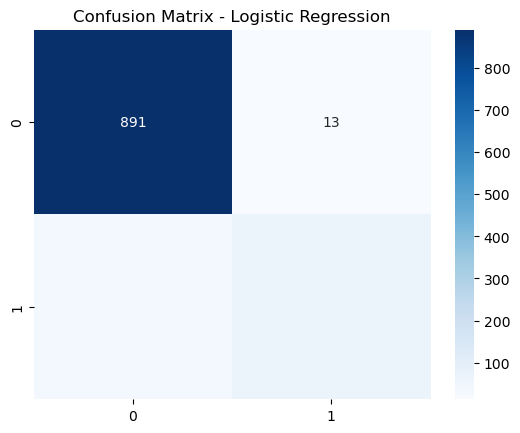


🌲 Random Forest Results:
Accuracy: 0.992
ROC AUC Score: 0.9987843381268438

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.94      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



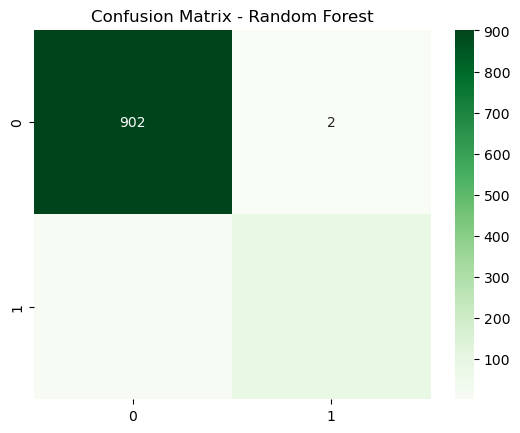


🚀 XGBoost Results:
Accuracy: 0.99
ROC AUC Score: 0.9987785766961651

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.94      0.96      0.95        96

    accuracy                           0.99      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



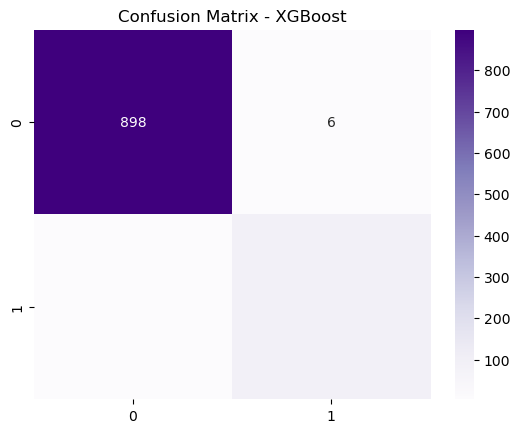

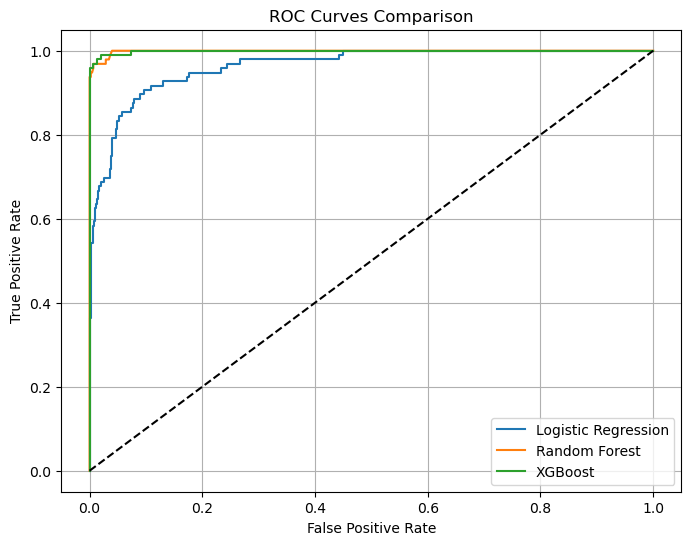

In [15]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# -----------------------
# Train Logistic Regression
# -----------------------
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression
print("🔍 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# -----------------------
# Train Random Forest
# -----------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest
print("\n🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# -----------------------
# Train XGBoost Classifier
# -----------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate XGBoost
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# -----------------------
# Compare ROC Curves
# -----------------------
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid()
plt.show()


In [22]:
import joblib
import os

# Make sure model directory exists
os.makedirs("model", exist_ok=True)

# Save the trained model (replace `xgb_model` with your actual model variable)
joblib.dump(xgb_model, "model/loan_model.pkl")

# Save the scaler (replace `scaler` with your actual StandardScaler object)
joblib.dump(scaler, "model/scaler.pkl")


['model/scaler.pkl']